# Jupyterlite Data Plotting POC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import requests
from pyodide.http import pyfetch

### Download data from API

In [2]:
url = "https://alplakes-eawag.s3.eu-central-1.amazonaws.com/simulations/simstrat/cache/geneva/doy_T.json"
response = await pyfetch(url)
data = await response.json()

#response = requests.get(url)
#data = response.json()

### Plot Data

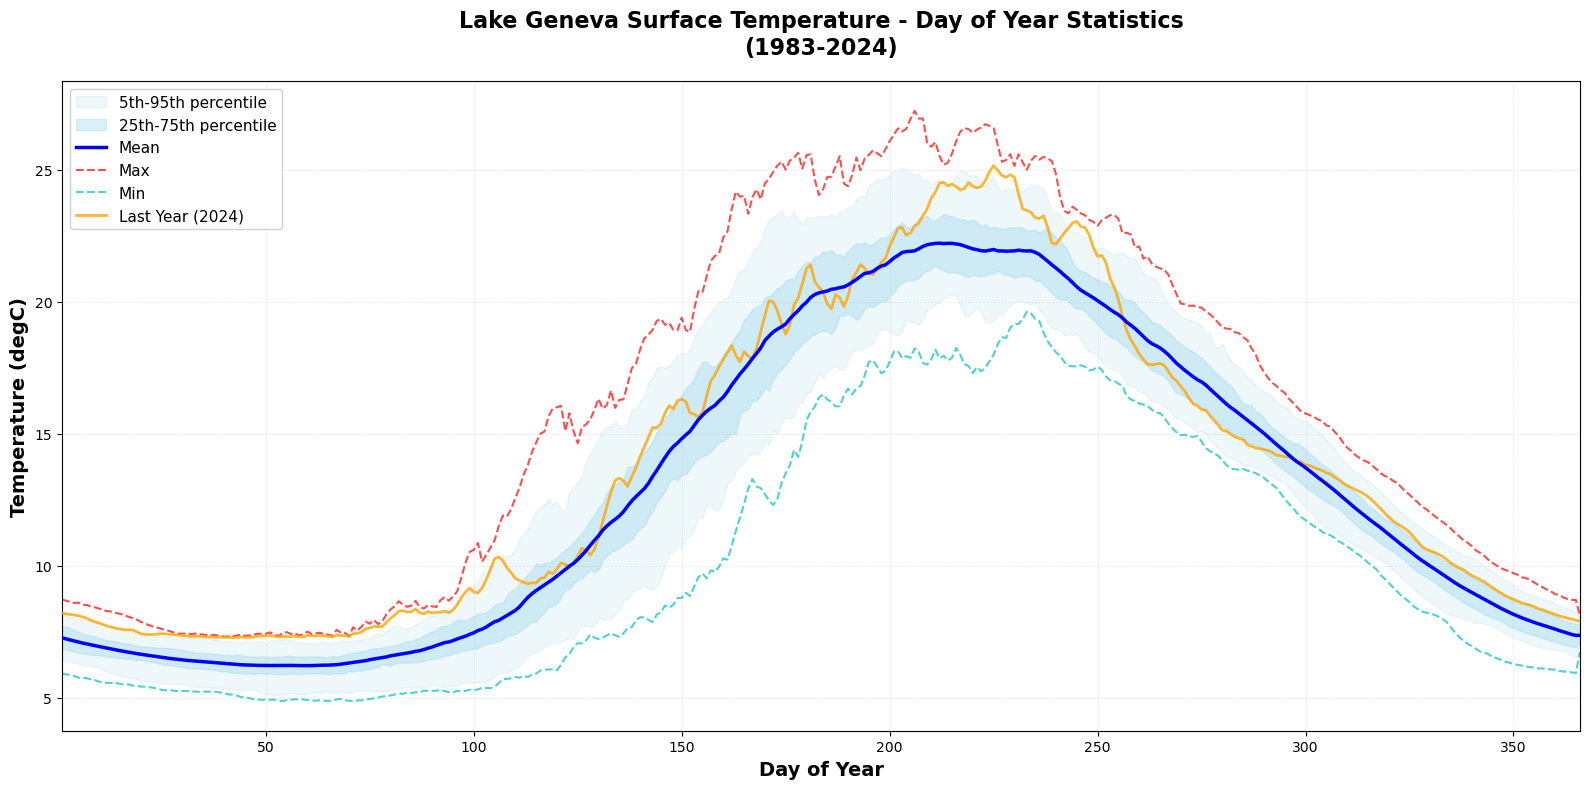

In [3]:
doy = np.array(data['variables']['doy']['data'])
mean_temp = np.array(data['variables']['mean']['data'])
max_temp = np.array(data['variables']['max']['data'])
min_temp = np.array(data['variables']['min']['data'])
std_temp = np.array(data['variables']['std']['data'])
perc5 = np.array(data['variables']['perc5']['data'])
perc25 = np.array(data['variables']['perc25']['data'])
perc75 = np.array(data['variables']['perc75']['data'])
perc95 = np.array(data['variables']['perc95']['data'])
lastyear = np.array(data['variables']['lastyear']['data'])
unit = data['variables']['mean']['unit']
start_time = data['start_time'][:4]  # Just the year
end_time = data['end_time'][:4]

fig, ax = plt.subplots(figsize=(16, 8))
ax.fill_between(doy, perc5, perc95, alpha=0.2, color='lightblue',
                label='5th-95th percentile')
ax.fill_between(doy, perc25, perc75, alpha=0.3, color='skyblue',
                label='25th-75th percentile')
ax.plot(doy, mean_temp, 'b-', linewidth=2.5, label='Mean', zorder=5)
ax.plot(doy, max_temp, 'r--', linewidth=1.5, alpha=0.7, label='Max')
ax.plot(doy, min_temp, 'c--', linewidth=1.5, alpha=0.7, label='Min')
ax.plot(doy, lastyear, 'orange', linewidth=2, label='Last Year (2024)',
        alpha=0.8, zorder=4)
ax.set_xlabel('Day of Year', fontsize=14, fontweight='bold')
ax.set_ylabel(f'Temperature ({unit})', fontsize=14, fontweight='bold')
ax.set_title(f'Lake Geneva Surface Temperature - Day of Year Statistics\n({start_time}-{end_time})',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.set_xlim(1, 366)
plt.tight_layout()
plt.show()